In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [58]:
#Plotting an histogram.
def plothisto(toPlot, xlabel,ylabel,title,bins = 50):
    plt.hist(toPlot, bins = bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [65]:
tsla = pd.read_csv("data/TSLA.csv")
display(tsla)

,PERMNO,date,RET
0,93436,20100629,C
1,93436,20100630,-0.002511
2,93436,20100701,-0.078473
3,93436,20100702,-0.125683
4,93436,20100706,-0.160938
...,...,...,...
2894,93436,20211227,0.025248
2895,93436,20211228,-0.005000
2896,93436,20211229,-0.002095
2897,93436,20211230,-0.014592


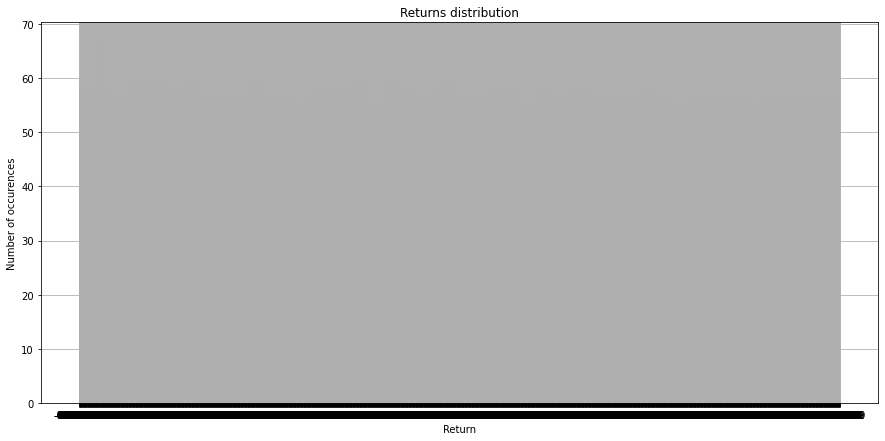

In [68]:
%matplotlib inline
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 1, 1)
tsla['RET'].hist(bins=50, ax=ax1)
ax1.set_xlabel('Return')
ax1.set_ylabel('Number of occurences')
ax1.set_title('Returns distribution')
plt.show()

In [3]:
df = pd.read_csv("data/elonmusk.csv")

In [4]:
df['length'] = df['text'].apply(lambda text: len(text.split()))
df

,Tweet,UserScreenName,UserName,Timestamp,text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,length
0,0,Elon Musk,@elonmusk,2010-06-04T18:31:57.000Z,"Please ignore prior tweets, as that was someon...",NaN,873,648,"5,453",[],https://twitter.com/elonmusk/status/15434727182,20
1,1,Elon Musk,@elonmusk,2011-12-01T09:55:11.000Z,Went to Iceland on Sat to ride bumper cars on ...,NaN,30,24,188,['https://pbs.twimg.com/media/Afkf5DMCAAEJGFr?...,https://twitter.com/elonmusk/status/1421799282...,27
2,2,Elon Musk,@elonmusk,2011-12-01T10:29:04.000Z,I made the volume on the Model S http://ow.ly/...,NaN,29,17,78,[],https://twitter.com/elonmusk/status/1421884581...,25
3,3,Elon Musk,@elonmusk,2011-12-03T08:20:28.000Z,"Great Voltaire quote, arguably better than Twa...",NaN,23,30,44,[],https://twitter.com/elonmusk/status/1428808713...,24
4,4,Elon Musk,@elonmusk,2011-12-03T08:22:07.000Z,That was a total non sequitur btw\n26\n14\n50,NaN,26,14,50,[],https://twitter.com/elonmusk/status/1428812840...,10
...,...,...,...,...,...,...,...,...,...,...,...,...
12201,12201,Elon Musk,@elonmusk,2022-03-03T04:25:03.000Z,Replying to \n@TheBabylonBee\n515\n464\n14.5K,🤣,515,464,14.5K,[],https://twitter.com/elonmusk/status/1499239406...,6
12202,12202,Elon Musk,@elonmusk,2022-03-03T08:13:32.000Z,Replying to \n@OwenSparks_\n @ICannot_Enough\n...,NaN,286,204,"4,003",[],https://twitter.com/elonmusk/status/1499296906...,11
12203,12203,Elon Musk,@elonmusk,2022-03-02T03:15:03.000Z,Replying to \n@DBurkland\nInvestigating\n350\n...,NaN,350,165,"5,133",[],https://twitter.com/elonmusk/status/1498859400...,7
12204,12204,Elon Musk,@elonmusk,2022-03-04T21:40:29.000Z,Replying to \n@RenataKonkoly\n @MLUKBrandenbur...,NaN,233,185,"4,191",[],https://twitter.com/elonmusk/status/1499862369...,13


0        2010-06-04
1        2011-12-01
2        2011-12-01
3        2011-12-03
4        2011-12-03
            ...    
12201    2022-03-03
12202    2022-03-03
12203    2022-03-02
12204    2022-03-04
12205    2022-03-04
Name: Timestamp, Length: 12206, dtype: object

In [16]:
df['day'] = pd.to_datetime(df['Timestamp'].apply(lambda date : date[0:10]))

## 2. Let's explore the distribution of lenght of tweets.

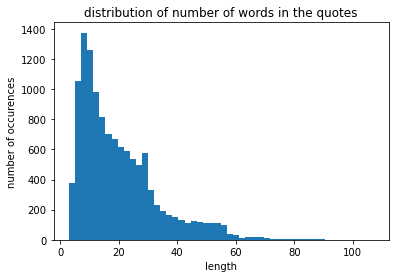

In [9]:
#Plotting an histogram of the length of the quotations in words.   
plothisto(df['length'], 'length','number of occurences','distribution of number of words in the quotes',50)

## 2. Let's explore the tweets mean lenght over time.

In [33]:
dailylen = df[['length','day']].groupby(by = 'day').mean().reset_index()
display(dailylen)

,day,length
0,2010-06-04,20.000000
1,2011-12-01,26.000000
2,2011-12-03,17.000000
3,2011-12-04,15.000000
4,2011-12-21,27.142857
...,...,...
2224,2022-02-26,11.333333
2225,2022-03-01,26.000000
2226,2022-03-02,29.428571
2227,2022-03-03,28.285714


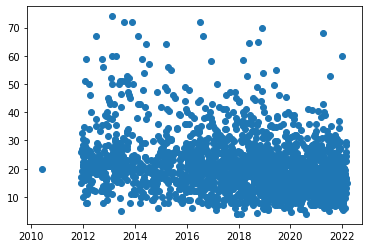

In [47]:
plt.scatter(dailylen['day'], dailylen['length']);

In [48]:
df['date_ordinal'] = pd.to_datetime(df['Timestamp']).apply(lambda date: date.toordinal())
display(df['date_ordinal'])

0        733927
1        734472
2        734472
3        734474
4        734474
          ...  
12201    738217
12202    738217
12203    738216
12204    738218
12205    738218
Name: date_ordinal, Length: 12206, dtype: int64

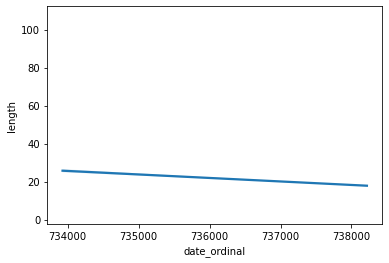

In [56]:
sns.regplot(x='date_ordinal', y='length', data=df,marker="None");

The lenght of the tweets of Elon Musk is decreasing over time!

## 2. Let's analyize the distribution of number of tweets over time.

In [ ]:
#Plotting an histogram of the Number of daily posts.   
plothisto(df['length'], 'length','number of occurences','distribution of number of words in the quotes',50)

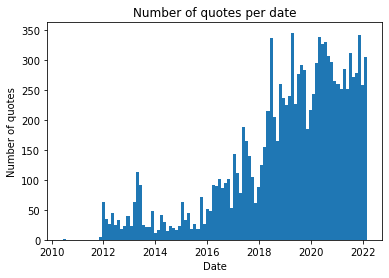

In [61]:
formatted_df = df.copy()
#change time format
formatted_df["date"] = pd.to_datetime(formatted_df['Timestamp'], format='%Y-%m-%d %H:%M:%S')

#plot the data
bins = 100
hist = plt.hist(formatted_df["date"].dt.date,bins)
#plt.xlim([datetime.date(2020, 3, 15), datetime.date(2020, 4, 1)])
#plt.xticks([datetime.date(2020, i, 1) for i in range(1,5)])
plt.xlabel("Date")
plt.ylabel("Number of quotes")
plt.title("Number of quotes per date")
plt.show()

We can observe that the number of Elon Musk's tweets has increased over time